# Exploratory Analysis 

In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [21]:
runner = pd.read_csv("../../../output/data_clean/cleaned_runner.csv", index_col=0)
race = pd.read_csv("../../../output/data_clean/cleaned_race.csv", index_col= 0)
runner.age_range = pd.Categorical(
    runner.age_range, categories=['16-25','26-40','40-60','61+','Undefined'],ordered=True
)
race.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1133 entries, 0 to 1206
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   race_year_id    1133 non-null   int64  
 1   event           1133 non-null   object 
 2   race            1133 non-null   object 
 3   country         1133 non-null   object 
 4   participation   1133 non-null   object 
 5   distance        1133 non-null   float64
 6   elevation_gain  1133 non-null   float64
 7   elevation_loss  1133 non-null   float64
 8   aid_stations    1133 non-null   int64  
 9   participants    1133 non-null   int64  
 10  year            1133 non-null   int64  
 11  month           1133 non-null   int64  
 12  day             1133 non-null   int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 123.9+ KB


<AxesSubplot:xlabel='age', ylabel='Count'>

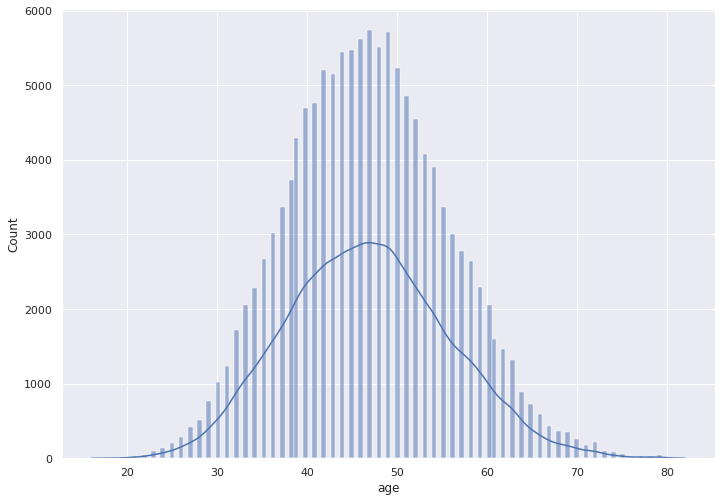

In [22]:
sns.histplot(
    x = runner.age,
    kde = True
)

<AxesSubplot:xlabel='year', ylabel='Count'>

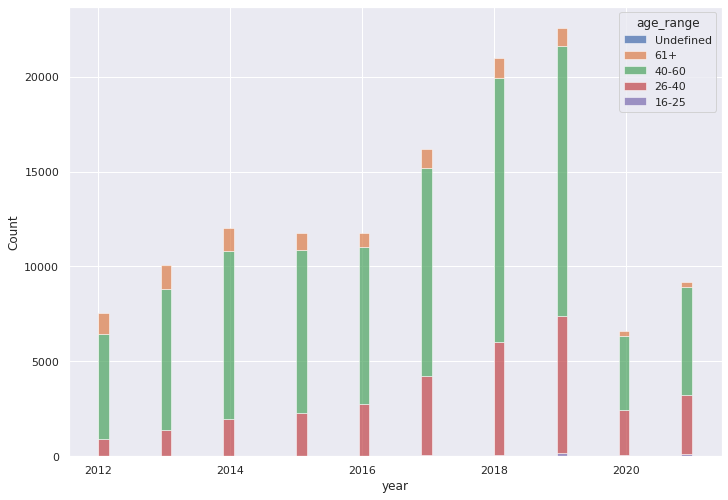

In [23]:
join = pd.merge(runner, race, left_on="race_year_id", right_on="race_year_id", how="left")
join = join.loc[join.age_range != "Undefined"]

sns.histplot(data=join, x="year", hue="age_range", multiple="stack",linewidth=.5,
            hue_order = ['Undefined','61+','40-60','26-40','16-25']
            )


<AxesSubplot:xlabel='year', ylabel='Count'>

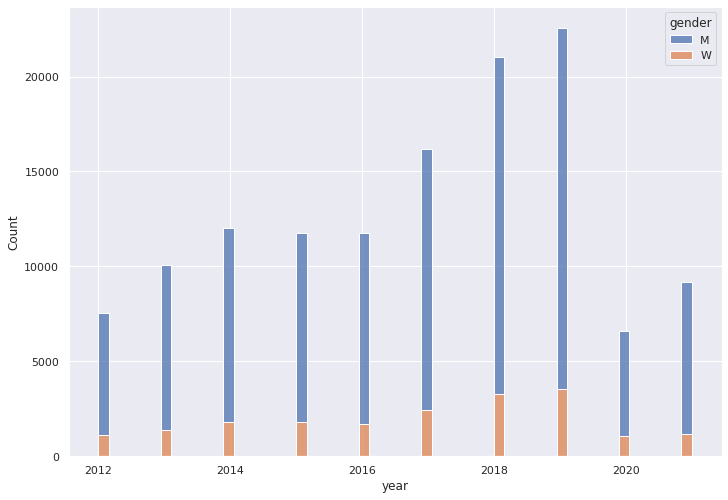

In [24]:
sns.histplot(data=join, x="year", hue="gender", multiple="stack")

In [25]:
join = join.loc[join.speed < 20]
join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112212 entries, 0 to 130136
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   race_year_id     112212 non-null  int64   
 1   ranking          112212 non-null  float64 
 2   runner           112212 non-null  object  
 3   time             112212 non-null  object  
 4   age              112212 non-null  float64 
 5   gender           112184 non-null  object  
 6   nationality      112212 non-null  object  
 7   time_in_seconds  112212 non-null  float64 
 8   age_range        112212 non-null  category
 9   speed            112212 non-null  float64 
 10  runner_id        112184 non-null  object  
 11  event            112212 non-null  object  
 12  race             112212 non-null  object  
 13  country          112212 non-null  object  
 14  participation    112212 non-null  object  
 15  distance         112212 non-null  float64 
 16  elevation_gain   112

<AxesSubplot:xlabel='speed', ylabel='Count'>

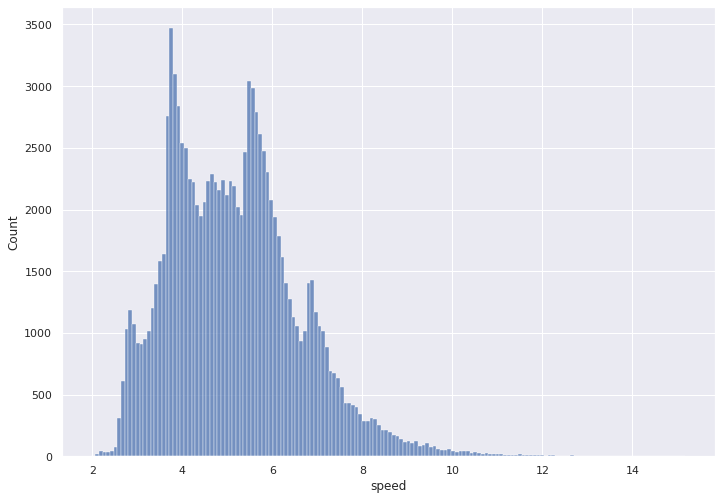

In [26]:
sns.histplot(
    x = "speed",
    data = join
)

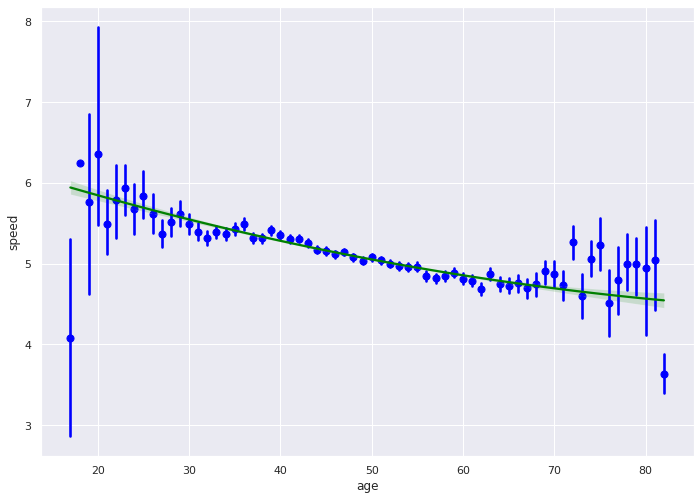

In [27]:
long_distances = join.loc[join.distance >= 140]

long_distances = join.loc[join.distance >= 140]
ax = sns.regplot(
    x = "age",
    y = "speed",
    data = long_distances[long_distances.gender == "M"],
    scatter_kws={"color": "blue"}, line_kws={"color": "green"},
    x_estimator=np.mean,
    order = 2
)

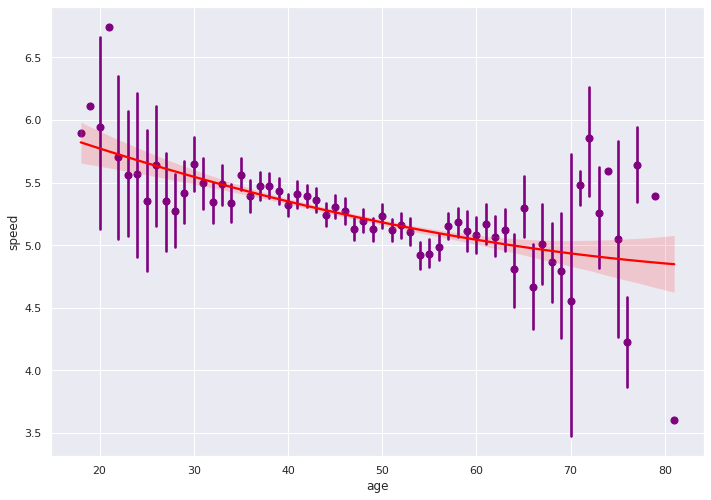

In [28]:
ax = sns.regplot(
    x = "age",
    y = "speed",
    data = long_distances[long_distances.gender == "W"],
    scatter_kws={"color": "purple"}, line_kws={"color": "red"},
    x_estimator=np.mean,
    order = 2
)

<AxesSubplot:xlabel='count', ylabel='country'>

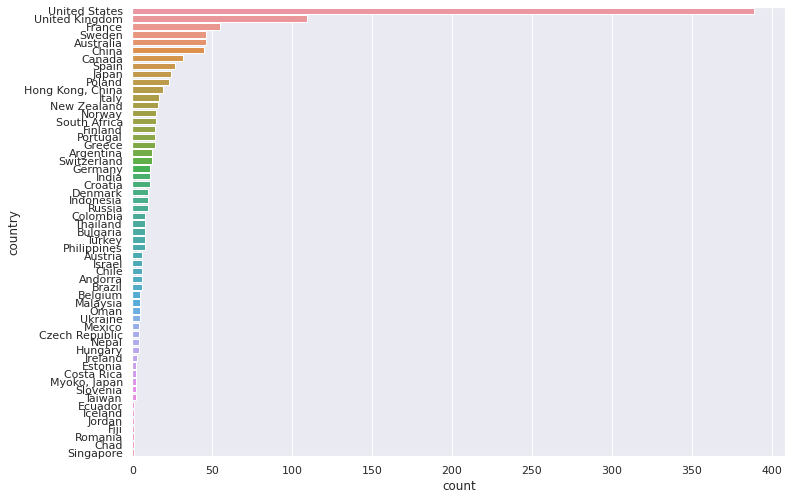

In [29]:
sns.countplot(
    y = "country",
    data = race,
    order = race['country'].value_counts().index
)

<AxesSubplot:xlabel='count', ylabel='nationality'>

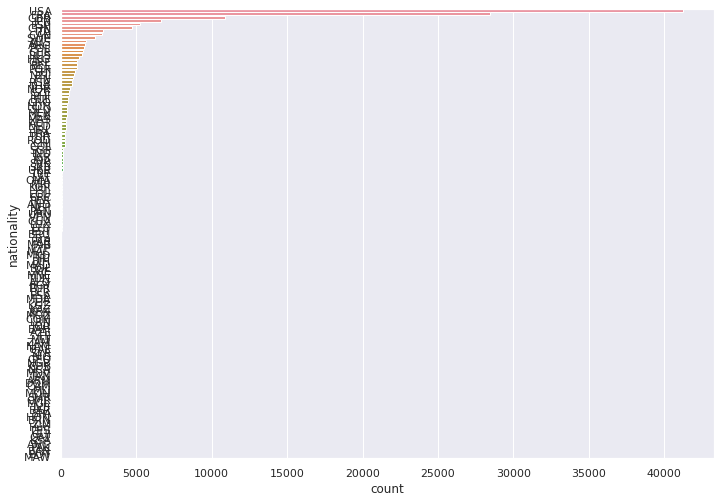

In [30]:
sns.countplot(
    y = "nationality",
    data = runner,
    order = runner['nationality'].value_counts().index
)

<AxesSubplot:xlabel='axis1', ylabel='axis2'>

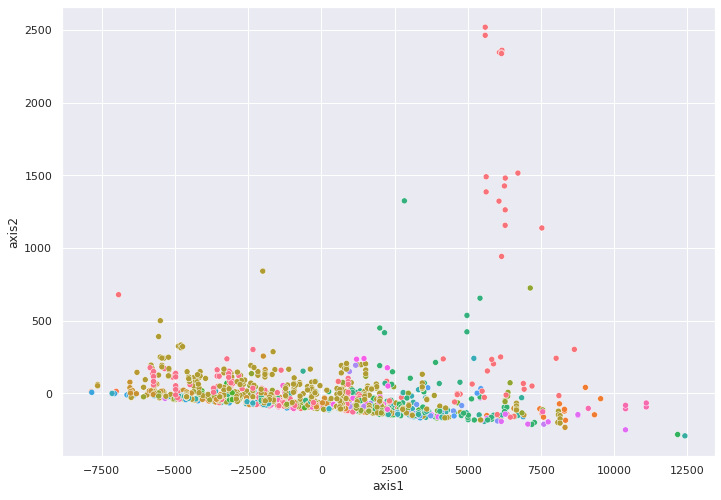

In [31]:
racequant = race[["distance", "elevation_gain","elevation_loss", "aid_stations", "participants"]]
cls0 = PCA(n_components=2)
pcs0 = cls0.fit_transform(racequant)

raceDf = pd.DataFrame(pcs0, columns=["axis1", "axis2"])
raceDf.index = race.index
raceDf = pd.concat([raceDf, race.country], axis=1)

sns.scatterplot(x = "axis1", y = "axis2", hue="country", data = raceDf, legend=False)

<AxesSubplot:xlabel='axis1', ylabel='axis2'>

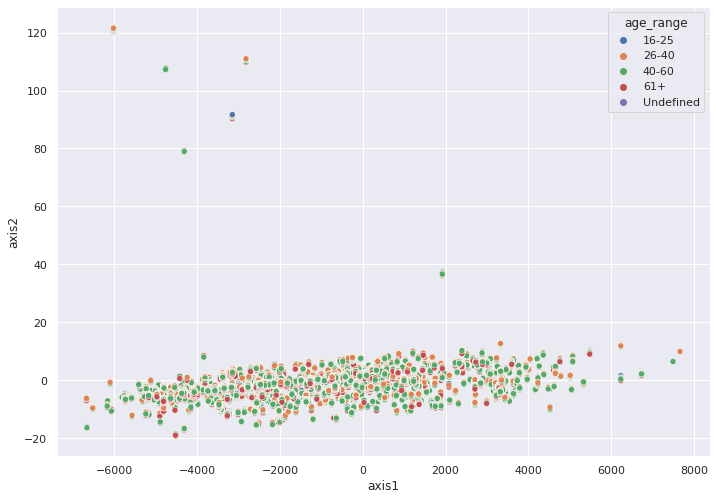

In [32]:
joinquant = join[["distance","age","speed","elevation_gain"]]

cls = PCA(n_components=4)
pcs = cls.fit_transform(joinquant)

X = pd.DataFrame(pcs, columns=["axis1", "axis2","axis3", "axis4"])
X.index = joinquant.index
X = pd.concat([X, join.age_range], axis=1)


sns.scatterplot(x = "axis1", y = "axis2", hue="age_range",data = X)

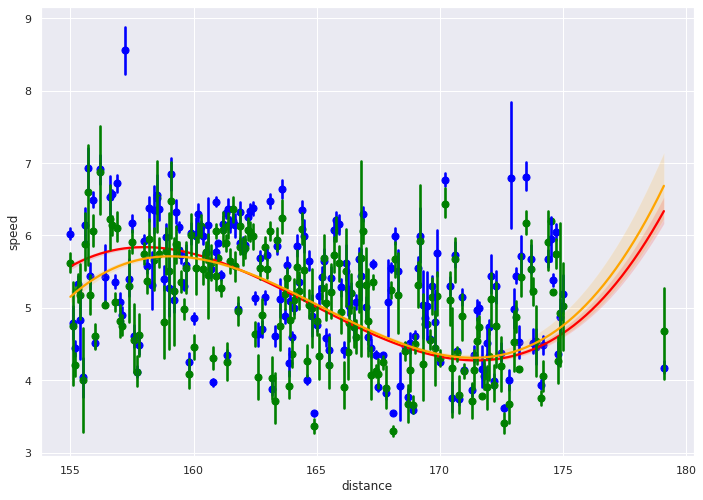

In [38]:
long_distances = join.loc[join.distance >= 150]
ax = sns.regplot(
    x = "distance",
    y = "speed",
    data = long_distances[long_distances.gender == "M"],
    scatter_kws={"color": "blue"}, line_kws={"color": "red"},
    x_estimator=np.mean,
    order = 3
)

ax = sns.regplot(
    x = "distance",
    y = "speed",
    data = long_distances[long_distances.gender == "W"],
    scatter_kws={"color": "green"}, line_kws={"color": "orange"},
    x_estimator=np.mean,
    order = 3
)

<AxesSubplot:xlabel='month', ylabel='speed'>

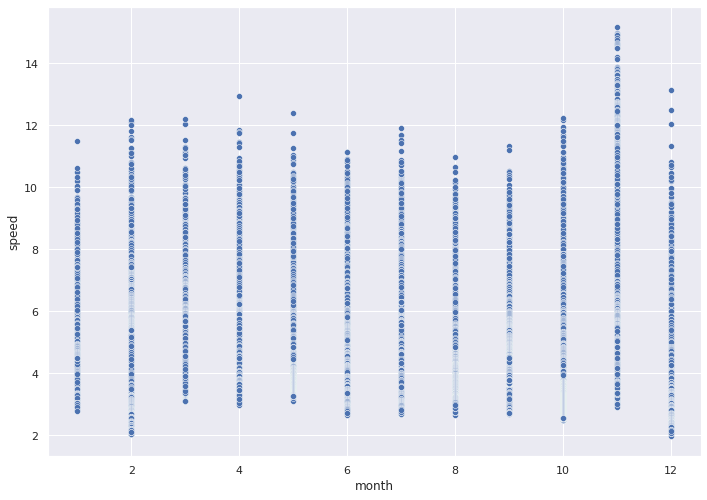

In [82]:
sns.scatterplot(
    x = "month",
    y ="speed",
    data = join
)

## Some simple analysis on UTMB®

In [41]:
race.loc[race.event == "UTMB®"]

,race_year_id,event,race,country,participation,distance,elevation_gain,elevation_loss,aid_stations,participants,year,month,day
1,72496,UTMB®,UTMB®,France,solo,170.7,9930.0,-9930.0,11,1526,2021,8,27
257,39881,UTMB®,UTMB®,France,solo,170.7,9930.0,-9930.0,16,2549,2019,8,30
454,25073,UTMB®,UTMB®,France,solo,170.0,9990.0,-9990.0,16,2565,2018,8,31
626,17383,UTMB®,UTMB®,France,solo,168.6,9980.0,-9980.0,16,2542,2017,9,1
771,11263,UTMB®,UTMB®,France,solo,171.0,10080.0,-10080.0,16,1469,2016,8,26


In [57]:
UTMB_runner = runner.loc[np.isin(runner.race_year_id, [72496,39881,25073,17383,11263])]

<AxesSubplot:xlabel='gender', ylabel='count'>

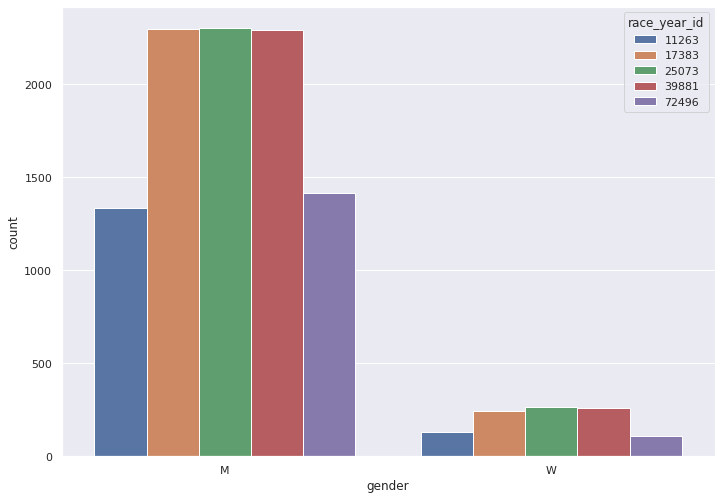

In [58]:
sns.countplot(
    x="gender",
    hue="race_year_id",
    data = UTMB_runner
)

<AxesSubplot:xlabel='age', ylabel='Count'>

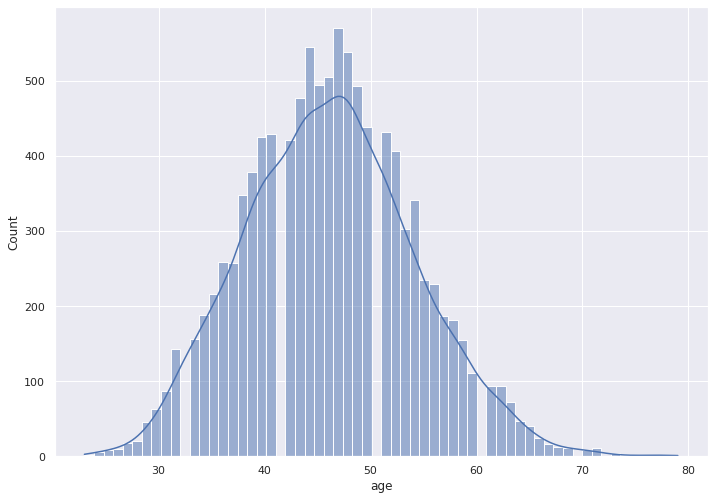

In [61]:
sns.histplot( x = UTMB_runner.age, kde = True)

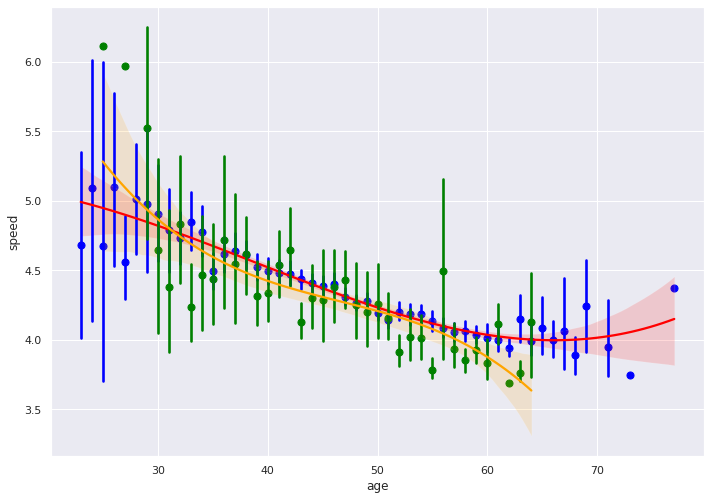

In [72]:
ax = sns.regplot(
    x = "age",
    y = "speed",
    data = UTMB_runner[UTMB_runner.gender == "M"],
    scatter_kws={"color": "blue"}, line_kws={"color": "red"},
    x_estimator=np.mean,
    order = 3
)
ax = sns.regplot(
    x = "age",
    y = "speed",
    data = UTMB_runner[UTMB_runner.gender == "W"],
    scatter_kws={"color": "green"}, line_kws={"color": "orange"},
    x_estimator=np.mean,
    order = 3
)


In [73]:
UTMB_runner

,race_year_id,ranking,runner,time,age,gender,nationality,time_in_seconds,age_range,speed,runner_id
25,72496,1.0,D HAENE Francois,20H 45M 59S,36.0,M,FRA,74759.0,26-40,8.220014,DHAENEFrancoisFRAM36.0
26,72496,2.0,DUNAND PALLAZ Aurelien,20H 58M 31S,29.0,M,FRA,75511.0,26-40,8.138152,DUNANDPALLAZAurelienFRAM29.0
27,72496,3.0,BLANCHARD Mathieu,21H 12M 43S,34.0,M,FRA,76363.0,26-40,8.047353,BLANCHARDMathieuFRAM34.0
28,72496,4.0,POMMERET Ludovic,21H 38M 44S,46.0,M,FRA,77924.0,40-60,7.886145,POMMERETLudovicFRAM46.0
29,72496,5.0,GRANGIER Germain,21H 52M 47S,31.0,M,FRA,78767.0,26-40,7.801744,GRANGIERGermainFRAM31.0
...,...,...,...,...,...,...,...,...,...,...,...
87942,11263,1464.0,MORIMITSU Chikara,46H 33M 34S,49.0,M,JPN,167614.0,40-60,3.672724,MORIMITSUChikaraJPNM49.0
87943,11263,1465.0,LONGHINI Joseph,46H 36M 57S,60.0,M,FRA,167817.0,40-60,3.668282,LONGHINIJosephFRAM60.0
87944,11263,1466.0,DENIS Samuel,46H 38M 13S,44.0,M,BEL,167893.0,40-60,3.666621,DENISSamuelBELM44.0
87945,11263,1467.0,PINGUET Jean Yves,46H 40M 12S,60.0,M,FRA,168012.0,40-60,3.664024,PINGUETJeanYvesFRAM60.0


<AxesSubplot:xlabel='count', ylabel='nationality'>

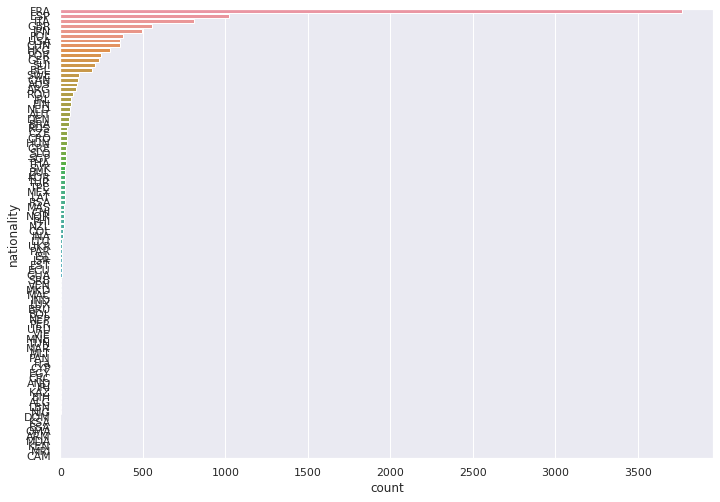

In [74]:
sns.countplot(
    y = "nationality",
    data = UTMB_runner,
    order = UTMB_runner['nationality'].value_counts().index
)

<AxesSubplot:xlabel='time_in_seconds', ylabel='Count'>

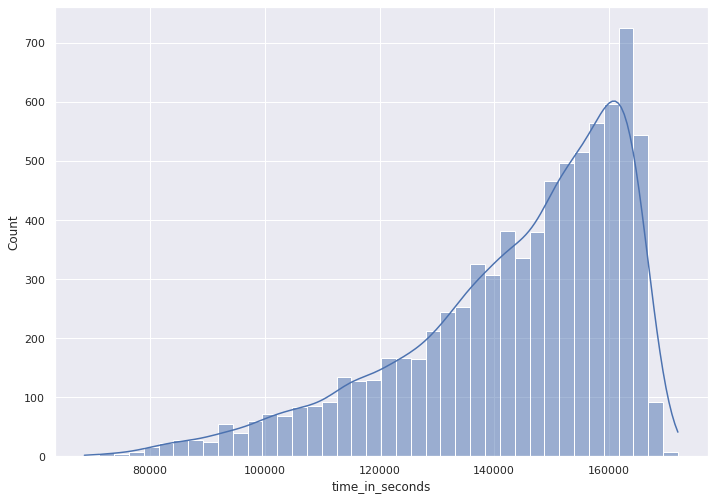

In [76]:
sns.histplot(
    x = UTMB_runner.time_in_seconds,
    kde = True
)

<AxesSubplot:>

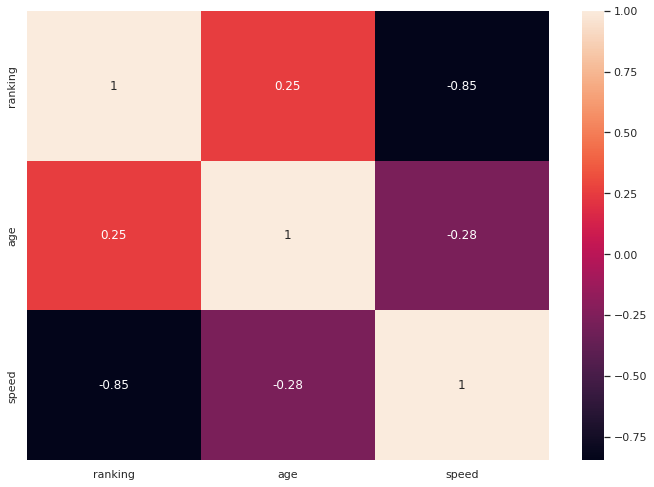

In [81]:
UTMB_runner_quant = UTMB_runner[["ranking","age","time","speed"]]
sns.heatmap(UTMB_runner_quant.corr(), annot=True)